In [5]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [4]:
!pip install pmdarima

In [6]:
df.head()

,Date,Close
0,01-07-2002,897.60
1,02-07-2002,903.65
2,03-07-2002,906.70
3,04-07-2002,916.80
4,05-07-2002,927.30


In [7]:
df.isna().sum()

Date     0
Close    0
dtype: int64

In [8]:
df_1=df.dropna()

In [9]:
df_1.head()

,Date,Close
0,01-07-2002,897.60
1,02-07-2002,903.65
2,03-07-2002,906.70
3,04-07-2002,916.80
4,05-07-2002,927.30


In [10]:
df_1.set_index("Date")

,Close
Date,
01-07-2002,897.60
02-07-2002,903.65
03-07-2002,906.70
04-07-2002,916.80
05-07-2002,927.30
...,...
23-09-2021,80220.70
24-09-2021,79456.50
27-09-2021,81893.40


In [11]:
size=int(len(df)*.9)
size

4298

In [12]:
df_train=df.Close.iloc[:size]
df_test=df.Close.iloc[size:]

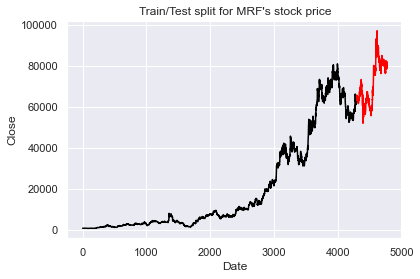

In [13]:
plt.plot(df_train,color = "black")
plt.plot(df_test,color = "red")
plt.title("Train/Test split for MRF's stock price")
plt.ylabel("Close")
plt.xlabel("Date")
sns.set()
plt.show()

In [14]:
import statsmodels.tsa.stattools as sts

In [15]:
sts.adfuller(df_train)

(0.15327633010251954,
 0.9695158312727058,
 31,
 4266,
 {'1%': -3.431883811345128,
  '5%': -2.862217753093994,
  '10%': -2.5671307731979045},
 65112.02812133323)

In [16]:
import statsmodels.graphics.tsaplots as sgt

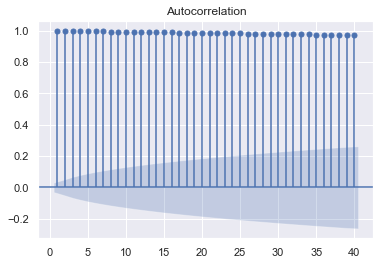

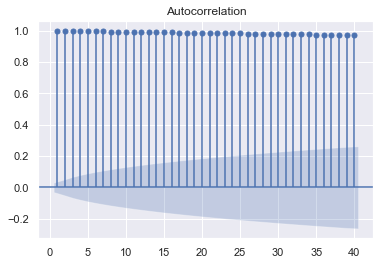

In [17]:
sgt.plot_acf(df_train,lags=40,zero=False)

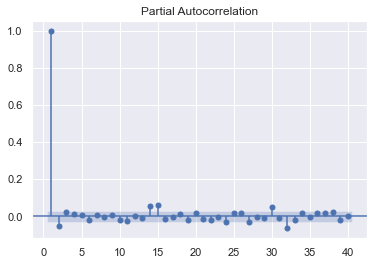

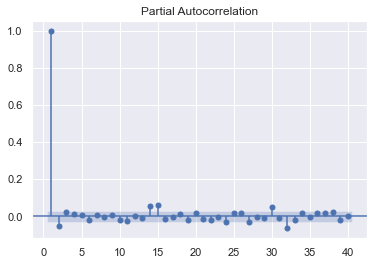

In [18]:
sgt.plot_pacf(df_train,lags=40,zero=False, method=('ols'))

In [19]:
from pmdarima.arima import auto_arima
model = auto_arima(df_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=65582.205, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=65588.498, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=65579.425, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=65578.929, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=65590.135, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=65579.804, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=65579.182, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=65580.994, Time=0.73 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=65580.206, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.910 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4298
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -32786.465
Date:                Wed, 25 Jan 2023   AIC                          65578.929
Time:                        05:15:52   BIC                          65598.026
Sample:                             0   HQIC                         65585.674
                               - 4298                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7936      8.289      1.664      0.096      -2.453      30.040
ma.L1          0.0530      0.008      6.779      0.000       0.038       0.068
sigma2      2.485e+05   1709.107    145.404      0.000    2.45e+05    2.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             66353.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              77.21   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
forecast = model.predict(n_periods=len(df_test))
forecast = pd.DataFrame(forecast,index=df_test.index,columns=['Prediction'])

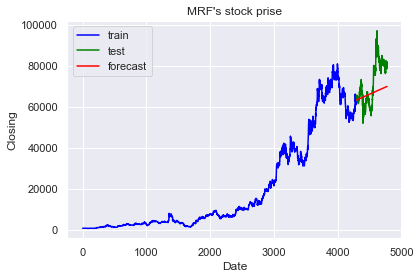

In [22]:
plt.plot(df_train, color="blue",label="Original Close")
plt.plot(df_test, color="green",label="Test")
plt.plot(forecast, color="red",label="forecast")
plt.title("MRF's stock prise")
plt.ylabel("Closing")
plt.xlabel("Date")
plt.legend(['train','test','forecast'])

In [23]:
pred=model.predict(start=len(df),n_periods=30)
pd1 = pd.DataFrame(pred,columns=['Prediction'])

In [24]:
pd1

,Prediction
4298,63290.761740
4299,63304.555333
4300,63318.348926
4301,63332.142519
4302,63345.936112
4303,63359.729705
4304,63373.523297
4305,63387.316890
4306,63401.110483
4307,63414.904076


In [25]:
pd1.isnull().sum()

Prediction    0
dtype: int64

In [26]:
pd1.astype(int, copy=True,errors='raise')

,Prediction
4298,63290
4299,63304
4300,63318
4301,63332
4302,63345
4303,63359
4304,63373
4305,63387
4306,63401
4307,63414


In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(df_test,forecast))
print("RMSE: ", rms)

RMSE:  10243.256186881978


In [28]:
arima_model=ARIMA(df_train,order=(2,2,2))
result_arima=arima_model.fit()
result_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 4296
Model:                 ARIMA(2, 2, 2)   Log Likelihood              -32781.947
Method:                       css-mle   S.D. of innovations            498.152
Date:                Wed, 25 Jan 2023   AIC                          65575.894
Time:                        05:18:32   BIC                          65614.086
Sample:                             2   HQIC                         65589.383
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0080      0.006      1.249      0.211      -0.005       0.021
ar.L1.D2.Close    -0.6477      0.205     -3.156      0.002      -1.050      -0.245
ar.L2.D2.Close     0.0200      0.021      0.943      0.346      -0.022       0.061
ma.L1.D2.Close    -0.3006      0.205     -1.469      0.142      -0.702       0.100
ma.L2.D2.Close    -0.6994      0.205     -3.419      0.001      -1.100      -0.298
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4767           +0.0000j            1.4767            0.5000
AR.2           33.9410           +0.0000j           33.9410            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.4298           +0.0000j            1.4298            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
plt.plot(df_train, color="blue",label="MRF's stock price")
plt.plot(df_test, color="green",label="test")
plt.plot(forecast, color="red",label="Forecast")
plt.title("MRF'S stock price")
plt.ylabel("Close")
plt.xlabel("Date")
plt.legend(['train','test','forecast'])

SyntaxError: invalid character in identifier (<ipython-input-31-bf01a0ee1e68>, line 1)